# Decision Trees
- **Decision trees** are versatile algorithms used for **classification**, **regression**, and **multioutput tasks**.
- They are **powerful** and can fit complex datasets, but can also **overfit**.
- **Random forests**, which are powerful machine learning algorithms, are built using decision trees.
- The Notebook will cover:
  - **Training, visualizing, and making predictions** with decision trees.
  - **CART algorithm** used by Scikit-Learn.
  - **Regularization** techniques for decision trees.
  - Using decision trees for **regression** tasks.
  - **Limitations** of decision trees.


In [63]:
# import basic modules, should be updated one
import sys
import sklearn
from packaging import version
import matplotlib.pyplot as plt

# Training and Visualizing a Decision Tree
- Build a **decision tree** to understand how it makes predictions.
- The code trains a **DecisionTreeClassifier** on the **iris dataset**.
- Use the **export_graphviz()** function to generate a graph definition file (e.g., `iris_tree.dot`).
- **Graphviz** can load and display the file using **graphviz.Source.from_file()** in a Jupyter notebook.
- **Graphviz** is an open-source graph visualization tool that can convert `.dot` files to formats like **PDF** or **PNG**.

In [64]:
# import modules and iris data, and train the model

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

# Making Predictions
- **Decision Tree Classification Example**:
  - Start at the root node (depth 0): checks if petal length < 2.45 cm.
    - If yes, move to the left child node (depth 1, left): a leaf node predicting Iris setosa.
    - If no, move to the right child node (depth 1, right): a split node asking if petal width < 1.75 cm.
      - If yes, predict Iris versicolor (depth 2, left).
      - If no, predict Iris virginica (depth 2, right).

- **Data Preparation**:
  - Decision trees require minimal data preparation.
  - No need for feature scaling or centering.

- **Node Attributes**:
  - **Samples**: Number of training instances in the node.
  - **Value**: Number of instances of each class in the node.
  - **Gini Impurity**: Measures node impurity (0 = pure node).

- **Example**:
  - Depth-1 right node: 100 instances, 54 with petal width < 1.75 cm.
  - Depth-2 left node: Gini impurity ≈ 0.168.

- **CART Algorithm**:
  - Produces binary trees (split nodes have exactly two children).

- **Decision Boundaries**:
  - Figure will show decision boundaries.
  - Vertical line at petal length = 2.45 cm.
  - Dashed line at petal width = 1.75 cm.
  - Additional boundaries if `max_depth` is increased.

- **Model Interpretation**:
  - Decision trees are **white box models**: intuitive and easy to interpret.
  - Random forests and neural networks are **black box models**: harder to interpret.
  - Interpretable ML aims to explain model decisions in a human-understandable way.


In [65]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

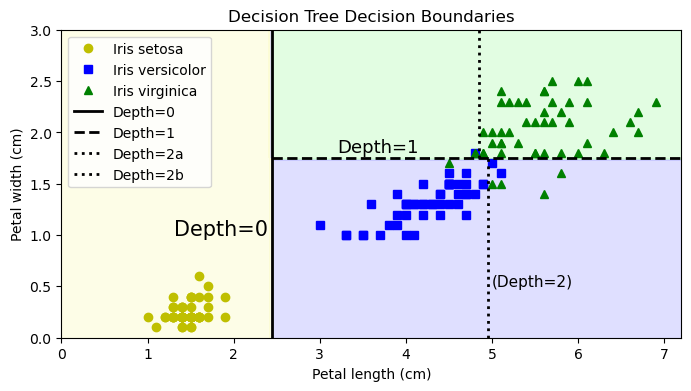

In [66]:
# Define a custom colormap for the decision boundaries
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

# Initialize the plot
plt.figure(figsize=(8, 4))

# Create a grid of petal lengths and widths for plotting decision boundaries
lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]

# Predict the class for each point in the grid
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)

# Plot the decision boundaries
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

# Plot the iris data points
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx], style, label=f"Iris {name}")

# Train a deeper decision tree to visualize more boundaries
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X_iris, y_iris)

# Extract thresholds for decision boundaries from the deeper tree
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

# Add axis labels
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")

# Plot the decision boundaries from the deeper tree
plt.plot([th0, th0], [0, 3], "k-", linewidth=2, label='Depth=0')  # Depth=0 boundary
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2, label='Depth=1')  # Depth=1 boundary
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2, label='Depth=2a')  # Depth=2a boundary
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2, label='Depth=2b')  # Depth=2b boundary

# Add text annotations to indicate decision boundaries' depths
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)

# Set the axis limits and add legend
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.title("Decision Tree Decision Boundaries", fontsize=12)
plt.show()


**Note:** A trained `DecisionTreeClassifier` has a `tree_` attribute that stores the tree's structure:

In [67]:
tree = tree_clf.tree_
tree

In [68]:
# You can get the total number of nodes in the tree
tree.node_count

5

**Note:** other self-explanatory attributes are available:

In [69]:
tree.max_depth

2

In [70]:
tree.max_n_classes

3

In [71]:
tree.n_features

2

In [72]:
tree.n_outputs

1

In [73]:
tree.n_leaves

3

In [74]:
# impurity of each node
tree.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

**NOTE:** it has a lot of self explanatory parameters, please feel free to learn them if you need them, Thank you !

# Estimating Class Probabilities
### Main Points:

- A decision tree can estimate the probability that an instance belongs to a specific class.
- The process involves traversing the tree to find the leaf node for the given instance.
- The probability is based on the ratio of training instances of the class in the node.
- Example:
  - A flower with petals 5 cm long and 1.5 cm wide leads to a leaf node.
  - Probabilities for each class at this node:
    - **Iris setosa**: 0% (0/54)
    - **Iris versicolor**: 90.7% (49/54)
    - **Iris virginica**: 9.3% (5/54)
  - The tree predicts **Iris versicolor** as it has the highest probability.


In [75]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [76]:
tree_clf.predict([[5, 1.5]])

array([1])

# Regularization Hyperparameters

### Main Points:
- **Regularization**:
  - Necessary to prevent overfitting by limiting the model's flexibility.
  - Scikit-Learn provides hyperparameters to regularize decision trees, including:
    - `max_depth`: Limits the tree depth (default is unlimited).
    - `max_features`: Restricts the number of features used at each node split.
    - `max_leaf_nodes`: Limits the number of leaf nodes.
    - `min_samples_split`: Minimum number of samples required to split a node.
    - `min_samples_leaf`: Minimum number of samples in a leaf node.
    - `min_weight_fraction_leaf`: Same as `min_samples_leaf` but as a fraction of total weighted instances.
  
  - Increasing `min_*` or reducing `max_*` hyperparameters helps regularize the tree and reduce overfitting.

- **Alternative Regularization**:
  - Some algorithms prune decision trees post-training, removing unnecessary nodes.
  - Nodes are pruned based on statistical significance, often using the χ² (chi-squared) test.
  - If a node’s improvement isn't statistically significant (p-value > 5%, for example), it is pruned.

- **Example**: Test regularization on the moons dataset by comparing decision trees with and without regularization (using `min_samples_leaf=5`).


In [77]:
# import the data and train two models with different parameter
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [78]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    """
    Plots the decision boundary of a classifier along with the training data.

    Parameters:
    -----------
    clf : classifier object
        The trained classifier used to predict the classes of new data points. 
        It must have a `predict` method that takes input data and returns predicted labels.
    
    X : array-like, shape (n_samples, 2)
        The training data features. Should contain two features for each sample.
    
    y : array-like, shape (n_samples,)
        The training data labels. Contains the target classes for each sample.
    
    axes : list or array, shape (4,)
        The axis limits for the plot in the format [x_min, x_max, y_min, y_max].
    
    cmap : str
        The color map used for visualizing the decision boundary. This should match one of the keys in the `colors` dictionary 
        used to define the custom colors for the plot.

    Returns:
    --------
    None
        The function generates a plot displaying the decision boundary of the classifier and the training data points.
    
    Notes:
    ------
    - A mesh grid is created over the feature space to evaluate the classifier's predictions at each point.
    - The predicted class for each point in the grid is used to draw a contour plot of the decision boundary.
    - The training data points are plotted with custom markers and colors for each class.
    - Axis labels and limits are set based on the provided `axes` argument.
    
    Example:
    --------
    >>> plot_decision_boundary(tree_clf, X_train, y_train, [-1.5, 2.4, -1, 1.5], cmap="Wistia")
    """
    
    # Create a mesh grid for plotting
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    # Predict the class for each point in the mesh grid
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    # Plot the decision boundary
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    
    # Define custom colors and markers
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    
    # Plot the training instances
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    
    # Set axis limits and labels
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)


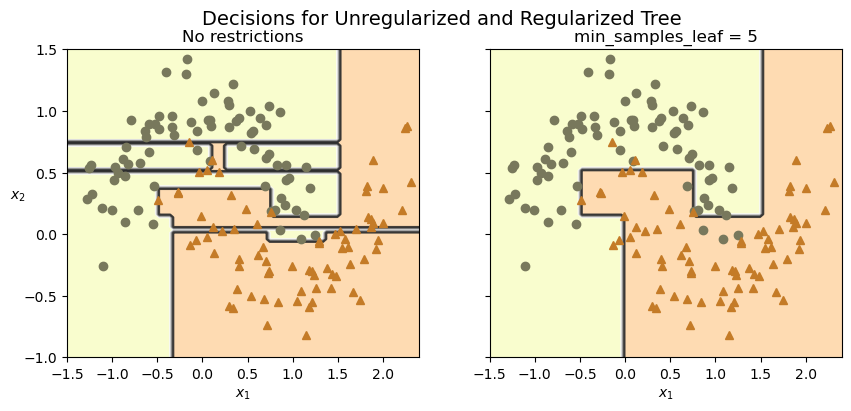

In [79]:
# Create subplots for side-by-side comparison
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Plot decision boundary for the unregularized tree
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons, 
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")

# Plot decision boundary for the regularized tree
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons, 
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")

# Add a main title and remove the y-label on the second plot
plt.ylabel("")
fig.suptitle("Decisions for Unregularized and Regularized Tree", fontsize=14)
plt.show()


In [80]:
# evaluating the model by test set
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
print("Score for the model_1: {}".format(tree_clf1.score(X_moons_test, y_moons_test)))

Score for the model_1: 0.898


In [81]:
print("Score for the model_1: {}".format(tree_clf2.score(X_moons_test, y_moons_test)))

Score for the model_1: 0.92


# Regression

### Main Points:

- **Decision Trees for Regression**:
  - Decision trees can be used for regression tasks using the `DecisionTreeRegressor` class in Scikit-Learn.
  - Instead of predicting a class, regression trees predict a continuous value at each leaf node.

- **How the Regression Tree Works**:
  - The tree asks sequential questions to split the dataset into regions.
  - Each leaf node predicts the average target value of the training instances in that region.
  - Example: For an instance with \( $x_1 = 0.2$ \), the tree traverses nodes and predicts a value based on the average of the associated training instances.

- **Prediction Mechanism**:
  - The predicted value in each region is the average target value of instances within that region.
  - The tree splits regions to minimize the Mean Squared Error (MSE) instead of impurity, as in classification tasks.

- **Overfitting in Regression Trees**:
  - Like in classification, decision trees can overfit in regression tasks.
  - Without regularization (e.g., using default parameters), the model can fit the training data too closely, leading to poor generalization.
  - Example: Using `min_samples_leaf=10` reduces overfitting and creates a more reasonable model.


In [82]:
# import the module
from sklearn.tree import DecisionTreeRegressor

In [83]:
# prepare a simple quadratic training set, and train the model

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [84]:
# second model
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [85]:
tree_reg.tree_.threshold

array([-0.30265072, -0.40830374, -2.        , -2.        ,  0.27175756,
       -2.        , -2.        ])

In [86]:
tree_reg2.tree_.threshold

array([-0.30265072, -0.40830374, -0.45416115, -2.        , -2.        ,
       -0.37022041, -2.        , -2.        ,  0.27175756, -0.21270403,
       -2.        , -2.        ,  0.40399227, -2.        , -2.        ])

In [87]:
# defining function to plot predictions

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    """
    Plots regression predictions of a decision tree.

    Parameters:
    -----------
    tree_reg : DecisionTreeRegressor
        The trained decision tree regressor.

    X : array-like, shape (n_samples,)
        The feature values used for plotting.

    y : array-like, shape (n_samples,)
        The target values used for plotting.

    axes : list, optional, shape (4,)
        The limits for the x and y axes in the format [x_min, x_max, y_min, y_max]. Default is [-0.5, 0.5, -0.05, 0.25].
    """
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    
    plt.axis(axes)
    plt.xlabel("$x_1$")
    
    # Plot the training data and the model predictions
    plt.plot(X, y, "b.", label="Training data")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

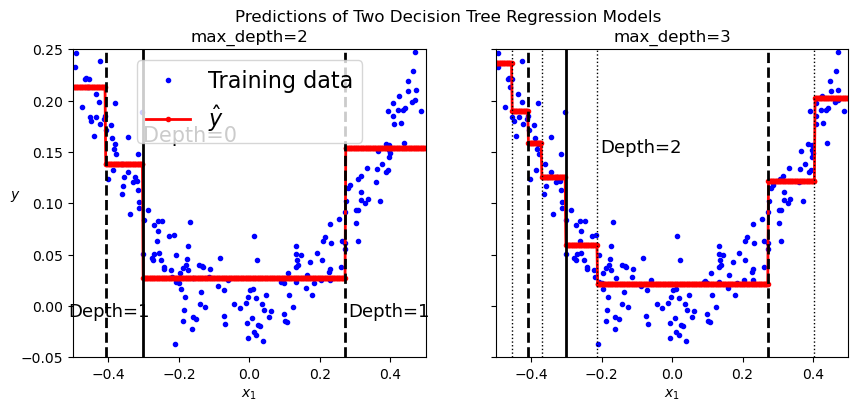

In [88]:
# plot the outcome

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Plot for the tree with max_depth=2
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

# Plot decision boundaries
th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)

# Annotate the plot
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

# Plot for the tree with max_depth=3
plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)

# Plot decision boundaries
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)

# Annotate the plot
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")
fig.suptitle("Predictions of Two Decision Tree Regression Models", fontsize=12)
plt.show()

**NOTE:
In regression tasks, the CART algorithm minimizes Mean Squared Error (MSE) rather than impurity, as it does in classification tasks.**


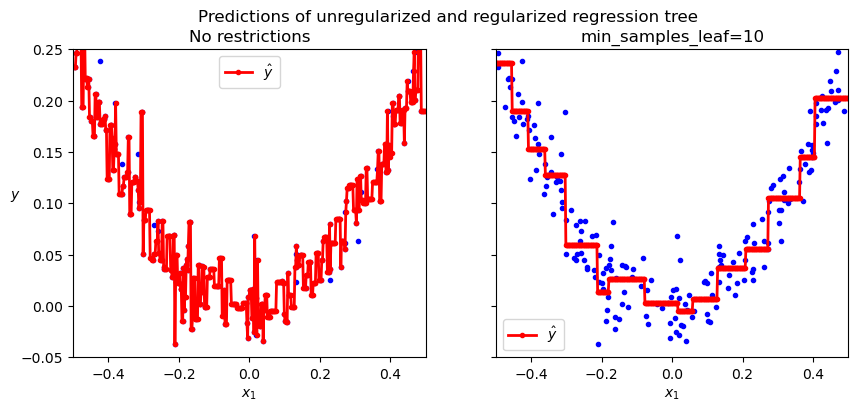

In [89]:
# difference between regularized and unregularized regression tree

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.legend()
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")
fig.suptitle("Predictions of unregularized and regularized regression tree")
plt.show()

# Sensitivity to axis orientation

### Main Points:

- **Decision Trees: Strengths and Limitations**:
  - Decision trees are easy to understand, interpret, versatile, and powerful.
  - However, they are sensitive to the orientation of the data because they prefer orthogonal (axis-aligned) decision boundaries.

- **Sensitivity to Axis Orientation**:
  - Example: A decision tree may split a linearly separable dataset effectively when not rotated, but the decision boundary becomes convoluted if the dataset is rotated (e.g., by 45°).
  - Despite fitting the training data perfectly, a rotated dataset may lead to poor generalization.

- **Mitigating Sensitivity**:
  - To address this issue, scale the data and apply Principal Component Analysis (PCA) to rotate the data and reduce feature correlation.
  - PCA can make the data orientation more suitable for decision trees.

- **Practical Example**:
  - A pipeline that scales and rotates the data using PCA, followed by training a `DecisionTreeClassifier`, can lead to improved decision boundaries.
  - The rotation aligns the data in a way that allows the decision tree to fit the dataset well using a single feature.

**Idea:** Rotating the dataset also leads to completely different decision boundaries:

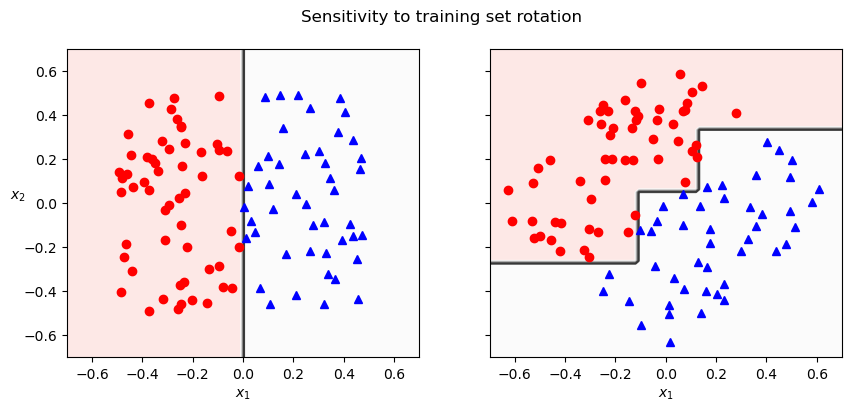

In [90]:
# generate and rotate data, train models, and plot the outcome

np.random.seed(6)
X_square = np.random.rand(100, 2) - 0.5
y_square = (X_square[:, 0] > 0).astype(np.int64)

angle = np.pi / 4  # 45 degrees
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                            [np.sin(angle), np.cos(angle)]])
X_rotated_square = X_square.dot(rotation_matrix)

tree_clf_square = DecisionTreeClassifier(random_state=42)
tree_clf_square.fit(X_square, y_square)
tree_clf_rotated_square = DecisionTreeClassifier(random_state=42)
tree_clf_rotated_square.fit(X_rotated_square, y_square)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_square, X_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.sca(axes[1])
plot_decision_boundary(tree_clf_rotated_square, X_rotated_square, y_square,
                       axes=[-0.7, 0.7, -0.7, 0.7], cmap="Pastel1")
plt.ylabel("")
fig.suptitle("Sensitivity to training set rotation", fontsize=12)
plt.show()

### Another Idea:

To address decision trees' sensitivity to data orientation, you can scale the data and apply Principal Component Analysis (PCA). PCA rotates the data to reduce feature correlation, making it easier for trees to handle. This approach can improve model performance by simplifying the decision boundaries, as shown when training a `DecisionTreeClassifier` on PCA-transformed data.

In [92]:
# import modules to use PCA to reduce the dimension of data, and train the model
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

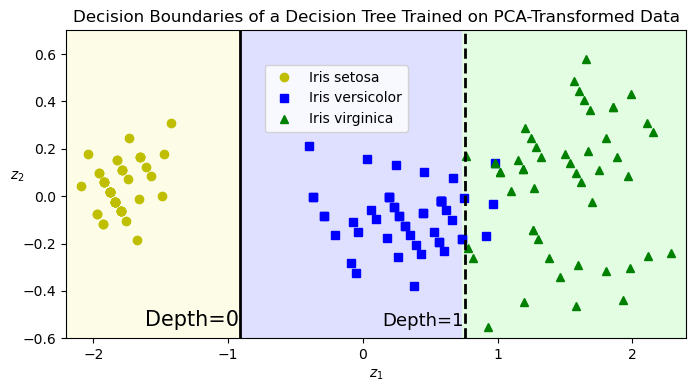

In [98]:
# Plot Decision Boundaries of a Decision Tree Trained on PCA-Transformed Data

plt.figure(figsize=(8, 4))

# Define axis limits for the plot
axes = [-2.2, 2.4, -0.6, 0.7]

# Create a meshgrid for predictions
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100), np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]

# Predict class for each point in the meshgrid
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

# Plot decision boundary with color fill
plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)

# Plot the PCA-transformed training data for each Iris class
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris_rotated[:, 0][y_iris == idx],
             X_iris_rotated[:, 1][y_iris == idx],
             style, label=f"Iris {name}")

# Set axis labels
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)

# Plot decision thresholds (tree splits)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)

# Annotate the depth of the tree at each split
plt.text(th1 - 0.01, axes[2] + 0.05, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(th2 - 0.01, axes[2] + 0.05, "Depth=1", horizontalalignment="right", fontsize=13)

# Set axis limits and legend
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
plt.title("Decision Boundaries of a Decision Tree Trained on PCA-Transformed Data", fontsize=12)
plt.show()


# Decision Trees Have High Variance

### Main Points:

- **Sensitivity to Dataset Changes**:
  - Decision trees are sensitive to small changes in the dataset, such as rotations, which can lead to significantly different trees.

- **Stochastic Nature of CART Algorithm**:
  - The CART training algorithm used by Scikit-Learn is stochastic, meaning the model can change even when trained on the same data.
  - Setting the `random_state` to a different value will produce a different decision tree each time.

- **Demonstration**:
  - By changing the `random_state`, you can observe how the decision tree model varies with each training run on the same dataset.


In [99]:
# define and train the model
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

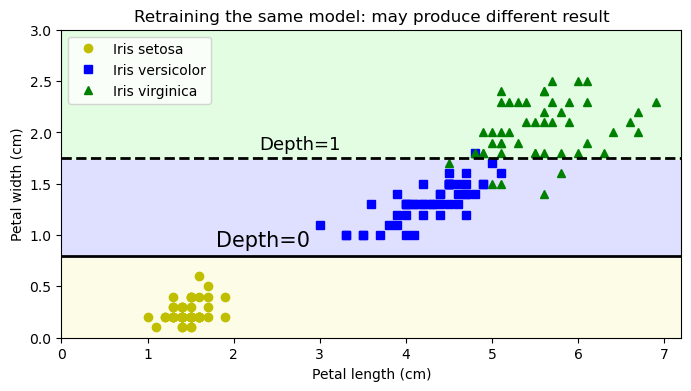

In [100]:
# plotting the outcome of the model

plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx],style, label=f"Iris {name}")

th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0 + 0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1 + 0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.title("Retraining the same model: may produce different result")
plt.show()

**Checkout:** That was the complete package of Decision Tree models to use diffent kinds of datasets! Thank you!